In [160]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [161]:
%store -r df
df = df


HANDLE OUTLIUERS

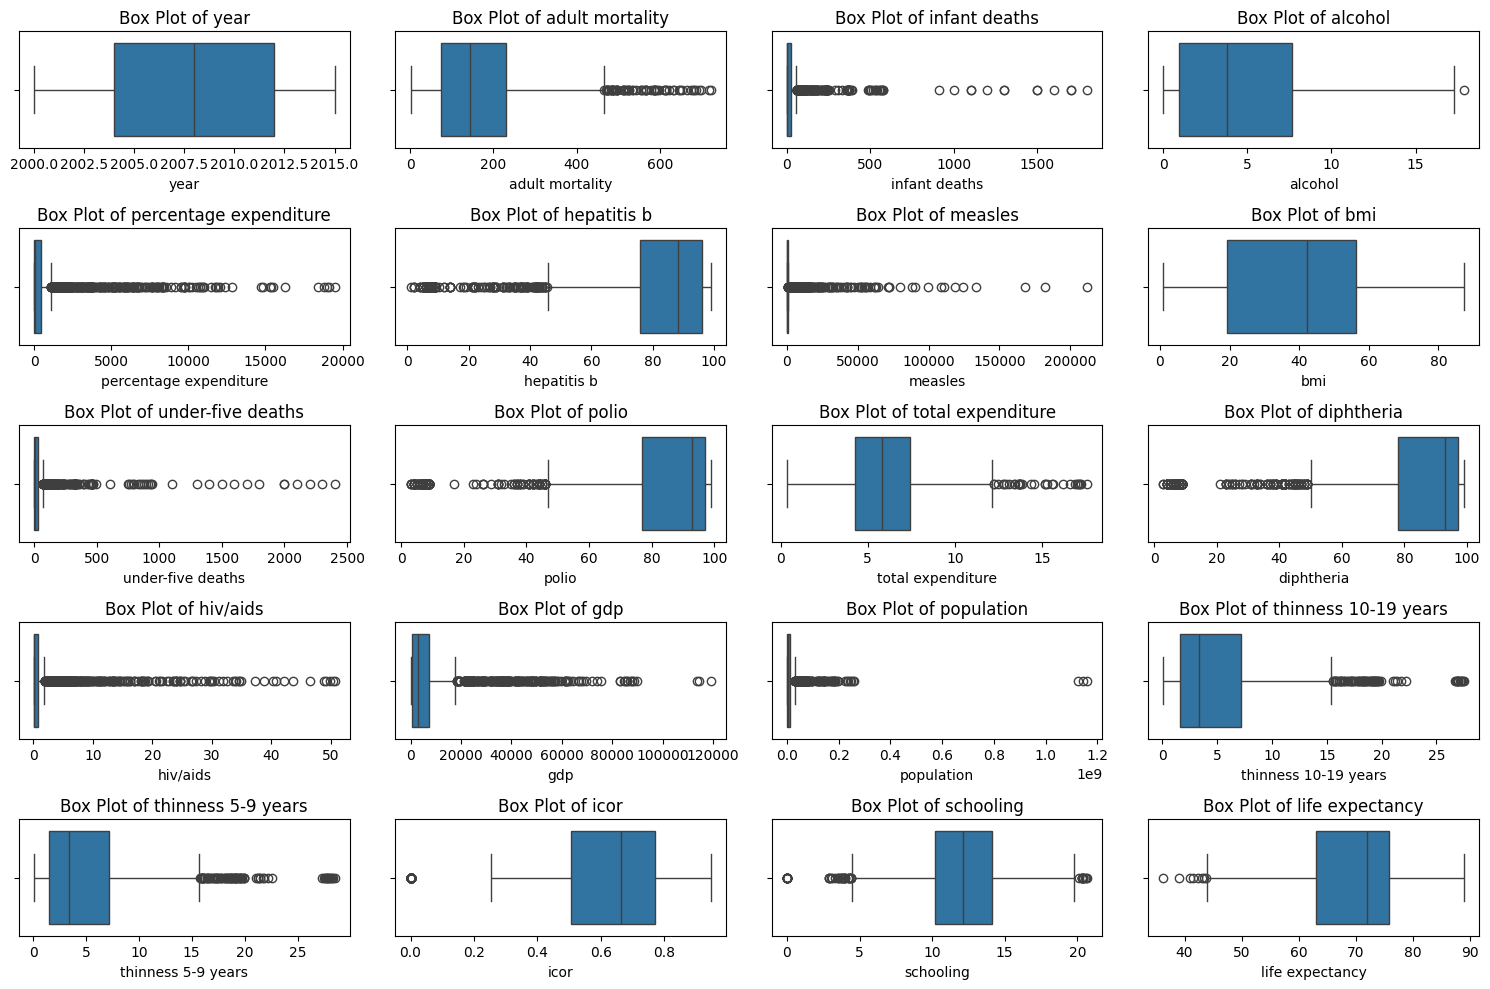

In [162]:
def box_plot(cols):
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        
    plt.tight_layout()
    plt.show()
    
box_plot(numerical_cols)
        

Some columns contain extreme outliers, however these outliers are real statistic/represenation of each country. In this dataset, we would not handle the outliers.

CATEGORICAL ENCODING

Since country has high cardinality we will use Mean Target encoding

In [163]:
country_mean_le = df.groupby('country')['life expectancy'].mean()
df['encoded_country'] = df['country'].map(country_mean_le)

df.drop(columns=['country'], inplace=True)

with open('../models/encoded_country.pkl', 'wb') as f:
    pickle.dump(country_mean_le, f)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2350 entries, 1059 to 1146
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2350 non-null   int64  
 1   status                  2350 non-null   object 
 2   adult mortality         2350 non-null   float64
 3   infant deaths           2350 non-null   int64  
 4   alcohol                 2350 non-null   float64
 5   percentage expenditure  2350 non-null   float64
 6   hepatitis b             2350 non-null   float64
 7   measles                 2350 non-null   int64  
 8   bmi                     2350 non-null   float64
 9   under-five deaths       2350 non-null   int64  
 10  polio                   2350 non-null   float64
 11  total expenditure       2350 non-null   float64
 12  diphtheria              2350 non-null   float64
 13  hiv/aids                2350 non-null   float64
 14  gdp                     2350 non-null   fl